# Algoritmos Não-Supervisionados para clusterização

## Aluno: Gabriel Figueírêdo Gomes

# Infraestrutura

### Versão python

In [1]:
!python -V

Python 3.9.5


### Printscreen do ambiente que está sendo usado rodando na máquina.

'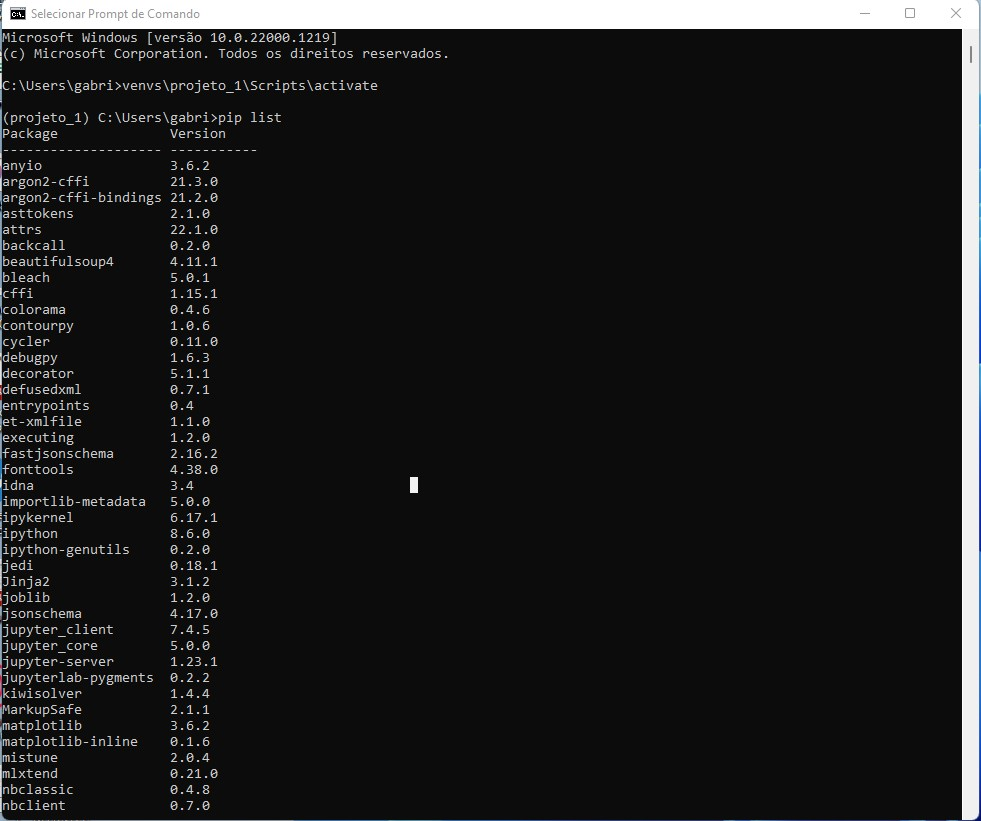'

# Escolha de base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

### 1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [3]:
dataset = pd.read_csv('Country-data.csv')

In [4]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 2. Quantos países existem no dataset?

In [5]:
dataset.shape

(167, 10)

In [6]:
print(f'Existem {dataset["country"].count()} países no dataset')

Existem 167 países no dataset


### 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [9]:
# verificando se existe dados nulos

dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# verificando se existe dados faltantes

dataset.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<AxesSubplot: >

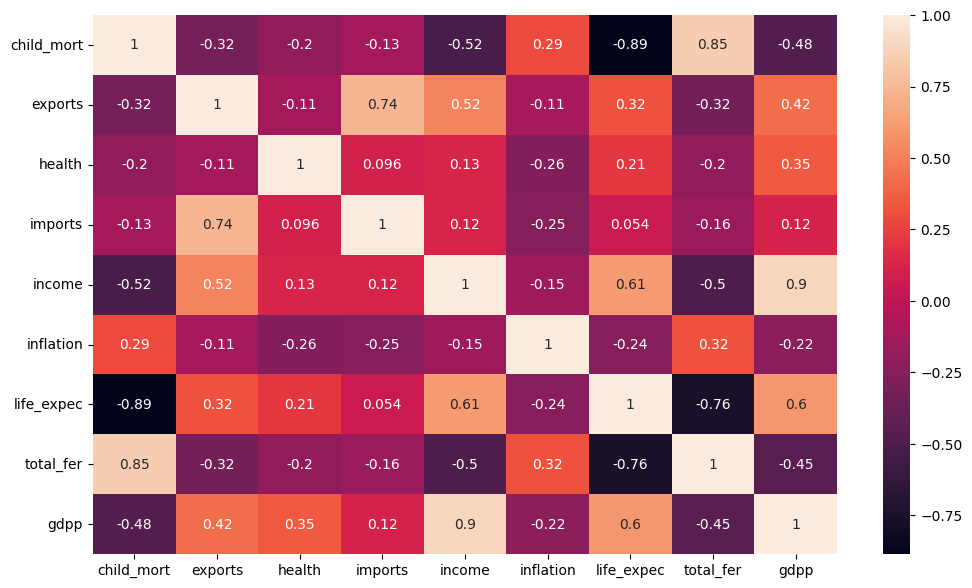

In [11]:
#correlação entre os dados
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(numeric_only=True), annot=True)

### 4. Realize o pré-processamento adequado dos dados.

In [12]:
# eliminando a coluna dos países
X_dataset = dataset.drop(['country'], axis=1)
X_dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
X_dataset.shape

(167, 9)

In [14]:
# Vamos pegar todos os valores pertencentes a essas colunas e colocar em um grande array e colocar dentro de uma variável 
#chamada x porque não temos as classes definidas.
X = X_dataset.values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [15]:
# Estamos trabalhando com medidas de distância. Visto que realizaremos um trabalhando com agrupamento dos dados e serão 
# feitas as distâncias entre os pontos até os centroides, como o K-means é feito.

# Para realizar essa medida de distância, os dados precisam estar na mesma escala. E ara estarem na mesma escala, precisamos 
#normalizar os dados. Então, vamos chamar o pacote do sklearn chamado StandardScaler para fazer essa padronização, 
#essa normalização dos dados.

# normalizando dados na mesma escala

scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Clusterização

### 1. Realizar o agrupamento dos países em 3 grupos distintos.

### 1. a. K-Means

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Embora no enuciado informe o número de cluster.
#Vamos plotar grafico do cotovelo para verificar a quantidade ideal de clusters.

wcss = []
for i in range(1, 11):
    kmeans_dados_e = KMeans(n_clusters=i, random_state=42)
    kmeans_dados_e.fit(X_normalizado)
    wcss.append(kmeans_dados_e.inertia_)
wcss

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086873,
 700.3229986404375,
 620.1633712888423,
 571.9992966496744,
 495.3233825951919,
 455.2768276047,
 426.45844564714736,
 396.2506989534299]

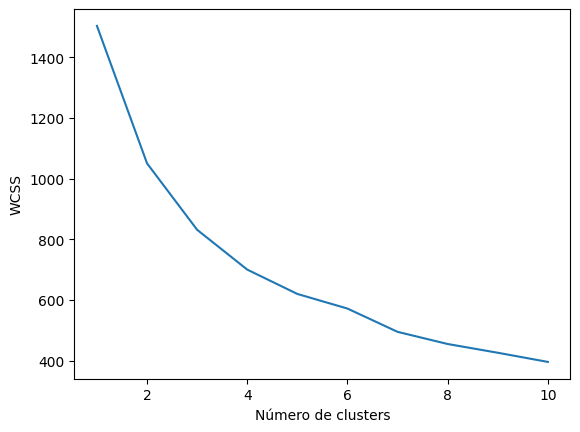

In [18]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
y = kmeans.fit_predict(X_normalizado)
y

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

Text(0.5, 1.0, 'Clusterização K-Means')

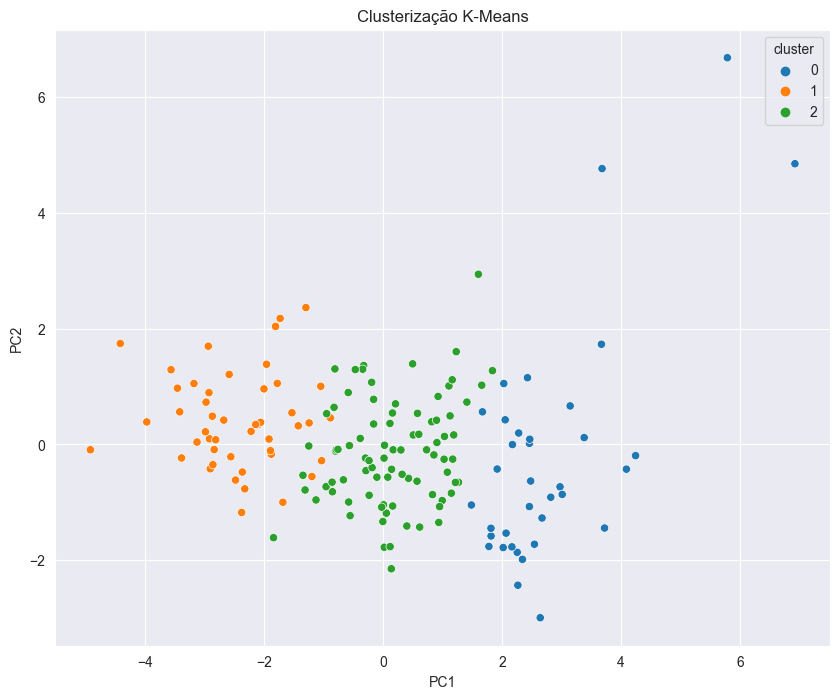

In [20]:
#plot visual da nossa clusterização.

sns.set_style("darkgrid")

def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)

plt.subplots(figsize=(10, 8))
plot_cluster_points(X_normalizado, kmeans.labels_)
plt.title('Clusterização K-Means')

In [21]:
df_kmeans = dataset.copy()
df_kmeans['cluster'] = y

In [22]:
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### 2 . Para os resultados, do K-Médias:


### I. Qual a distribuição das dimensões em cada grupo

In [23]:
clusters_0 = df_kmeans[df_kmeans['cluster']==0]
clusters_1 = df_kmeans[df_kmeans['cluster']==1]
clusters_2 = df_kmeans[df_kmeans['cluster']==2]

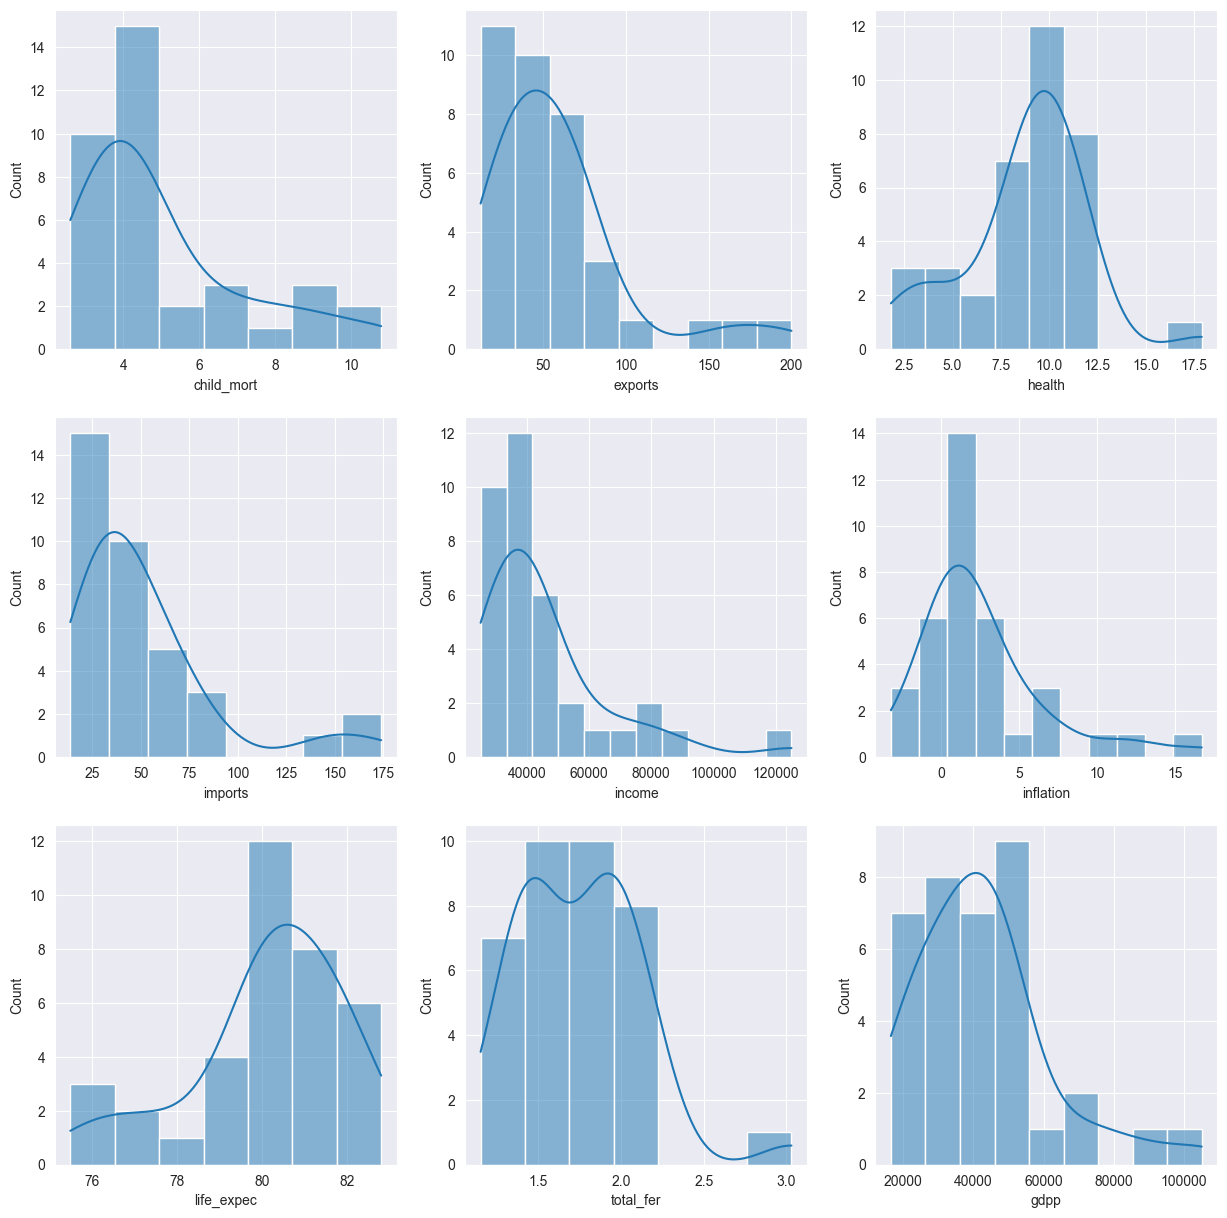

In [24]:
#distribuição grupo 0

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(clusters_0.columns[2:])):
    plt.subplot(3,3,i+1)
    sns.histplot(data=clusters_0.iloc[:, 1:10], x=clusters_0.iloc[:, 1:10].columns[i], kde=True)
plt.show()

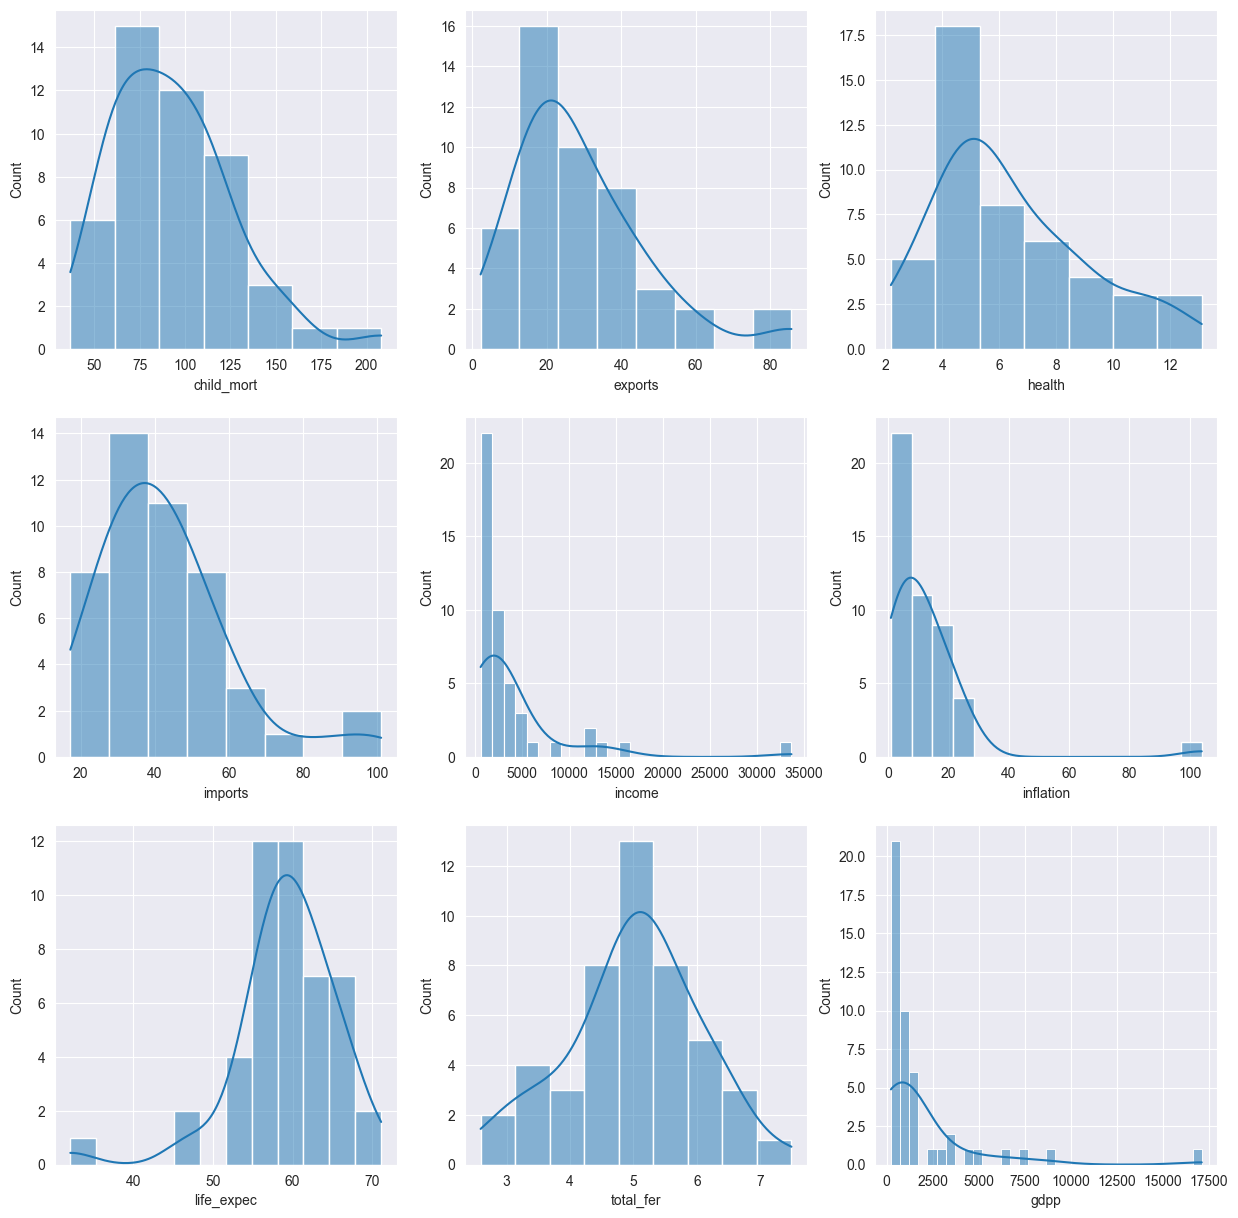

In [25]:
#distribuição grupo 1

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(clusters_1.columns[2:])):
    plt.subplot(3,3,i+1)
    sns.histplot(data=clusters_1.iloc[:, 1:10], x=clusters_1.iloc[:, 1:10].columns[i], kde=True)
plt.show()

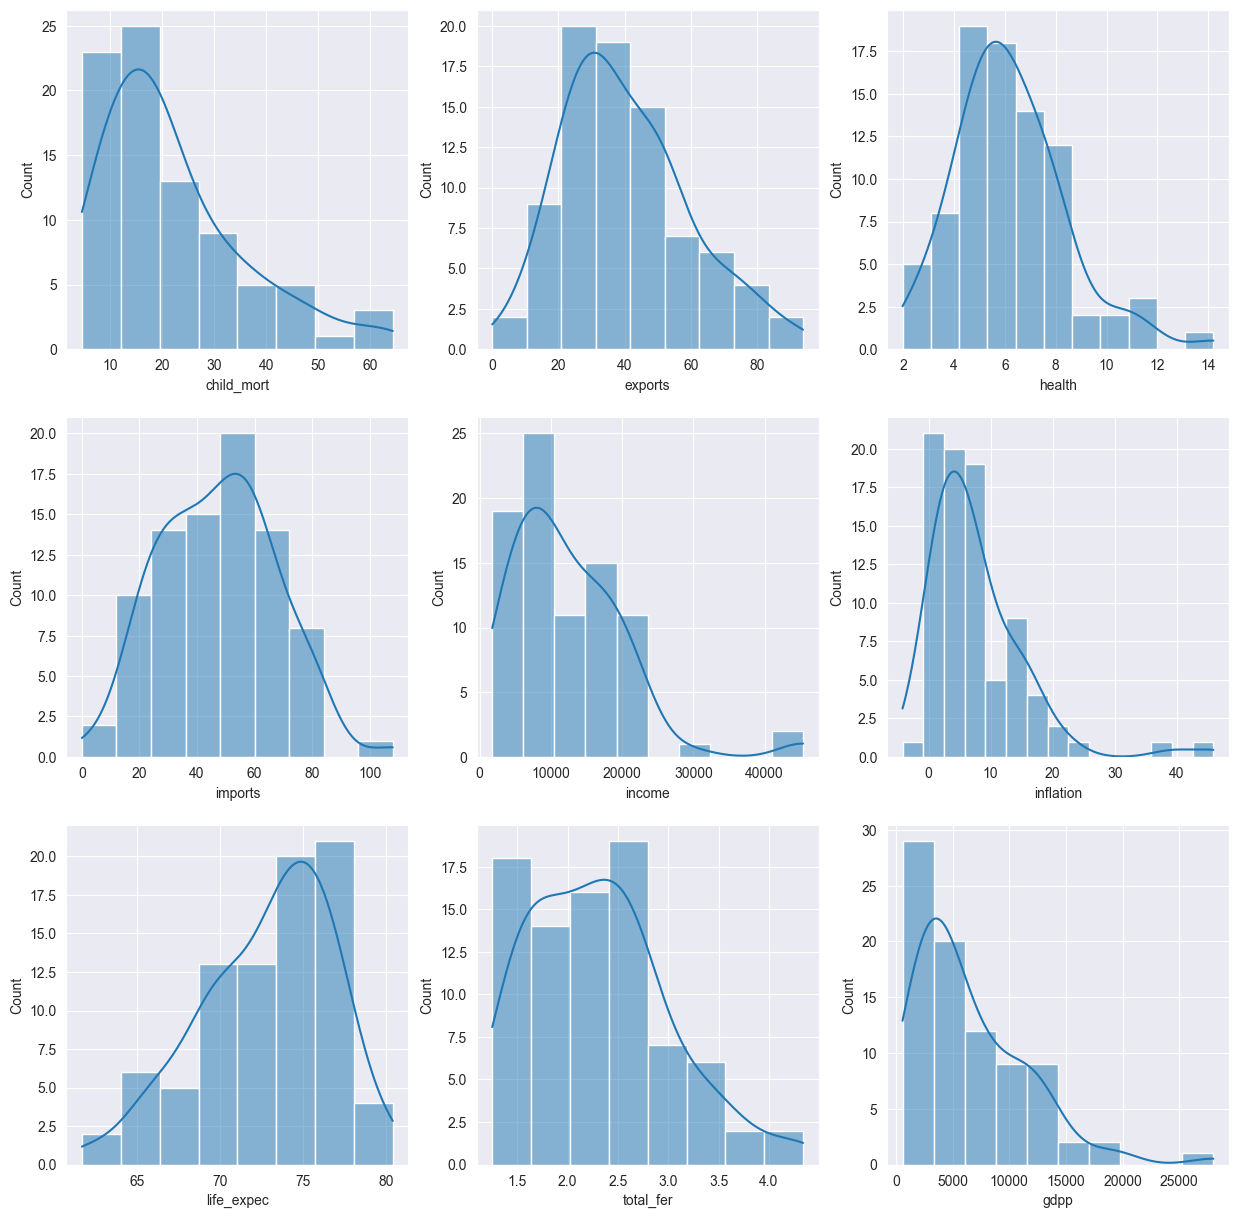

In [26]:
#distribuição grupo 2

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(clusters_2.columns[2:])):
    plt.subplot(3,3,i+1)
    sns.histplot(data=clusters_2.iloc[:, 1:10], x=clusters_2.iloc[:, 1:10].columns[i], kde=True)
plt.show()

### II. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

In [27]:
todas_distancias = kmeans.fit_transform(X_normalizado)
todas_distancias[:5]

array([[5.78155681, 1.0860896 , 3.70748731],
       [3.18403066, 3.602306  , 0.83703077],
       [3.74437502, 3.13222868, 1.41463189],
       [6.23511527, 2.26757607, 4.32361304],
       [2.50034165, 3.82116699, 1.06253633]])

In [28]:
distancias = []
for i in todas_distancias:
    distancias.append(i.min())

distancias[:5]

[1.086089603854432,
 0.8370307734994334,
 1.4146318946657488,
 2.2675760668023544,
 1.06253633123967]

In [29]:
df_kmeans['distancias'] = distancias
df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1.086090
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0.837031
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1.414632
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2.267576
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1.062536


In [30]:
clusters_0 = df_kmeans[df_kmeans['cluster']==0]
clusters_1 = df_kmeans[df_kmeans['cluster']==1]
clusters_2 = df_kmeans[df_kmeans['cluster']==2]

In [31]:
# O país, de acordo com o algoritmo, melhor representa o grupo 0.
clusters_0[clusters_0['distancias'] == clusters_0['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
68,Iceland,2.6,53.4,9.4,43.3,38800,5.47,82.0,2.2,41900,0,0.731764


In [32]:
# O país, de acordo com o algoritmo, melhor representa o grupo 1.
clusters_1[clusters_1['distancias'] == clusters_1['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
63,Guinea,109.0,30.3,4.93,43.2,1190,16.1,58.0,5.34,648,1,0.829088


In [33]:
# O país, de acordo com o algoritmo, melhor representa o grupo 2.
clusters_2[clusters_2['distancias'] == clusters_2['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
76,Jamaica,18.1,31.3,4.81,49.6,8000,9.81,74.7,2.17,4680,2,0.734379


<font size="4"> Os países que melhor representa seu agrupamento de forma respectiva são Iceland, Guinea e Jamaica. Isso por que conforme mostra nos códigos a cima, são os países que estão mais próximos dos seus centroídes. </font>

### 1. b. Clusterização Hierárquica

### 3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

In [34]:
import scipy.cluster.hierarchy as sch

df_hc = pd.read_csv("Country-data.csv", sep=',', index_col=0)
df_hc.head(6)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


Text(0, 0.5, 'Euclidean Distance')

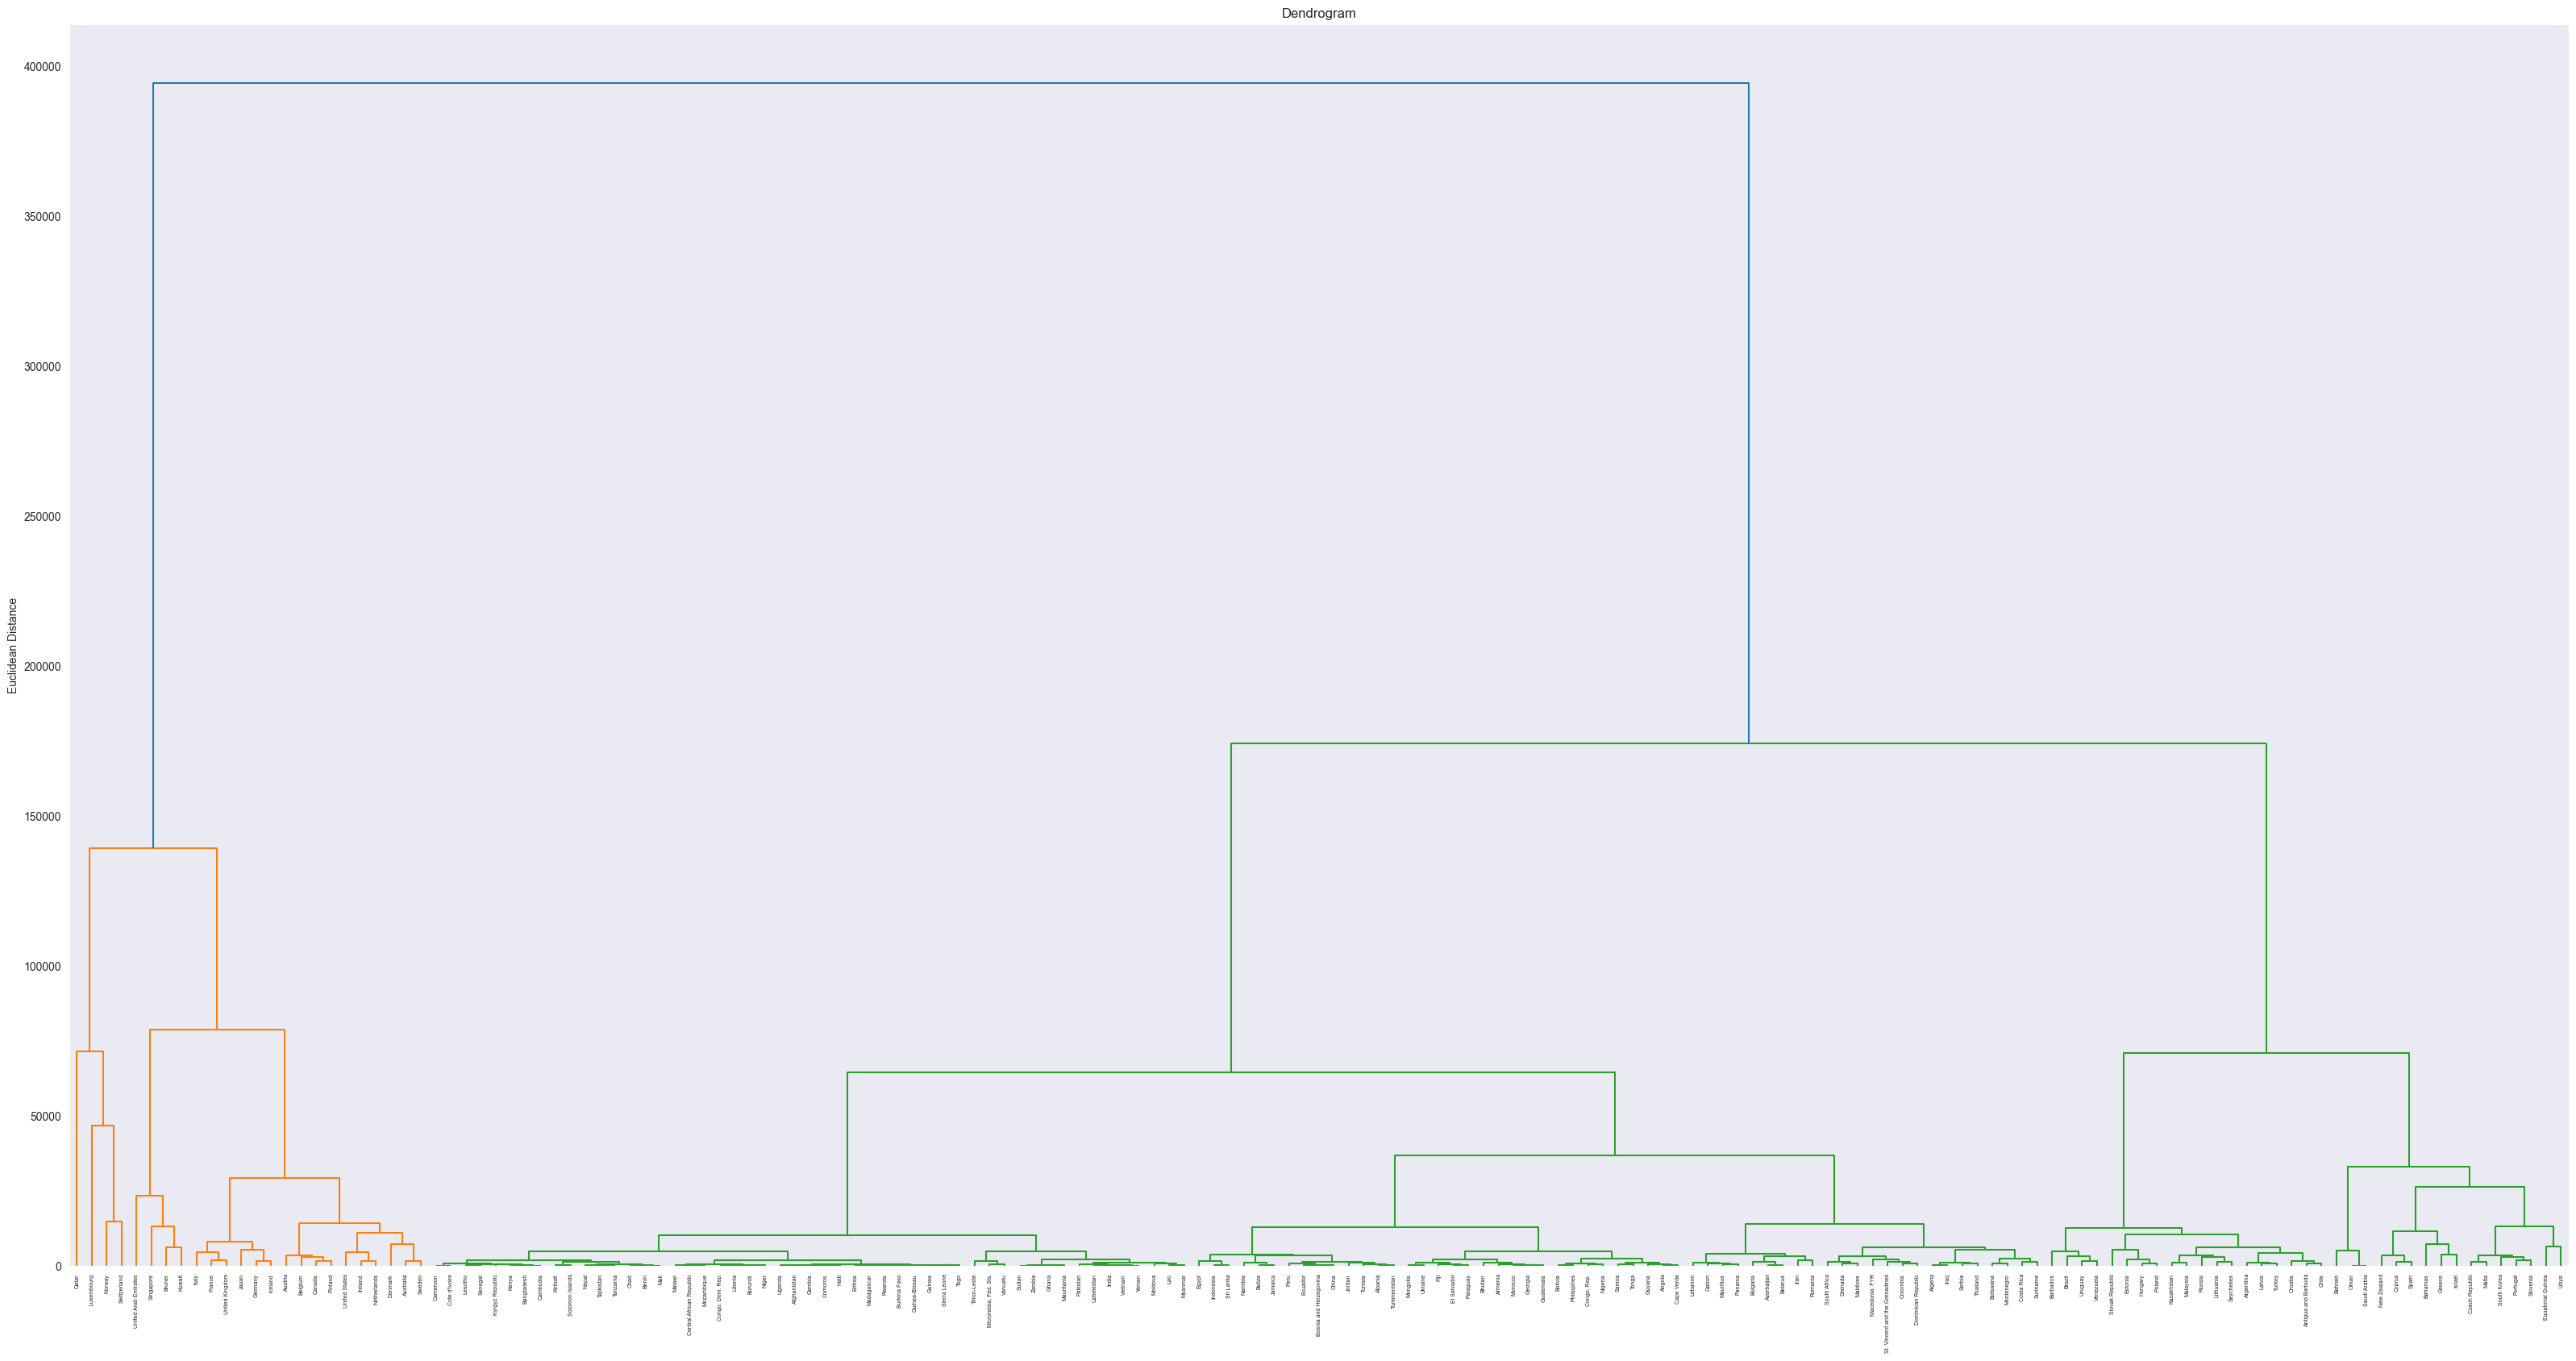

In [35]:
plt.figure(figsize=(40, 20))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_hc, method='ward'), labels=df_hc.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [36]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

### 3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

Text(0, 0.5, 'Euclidean Distance')

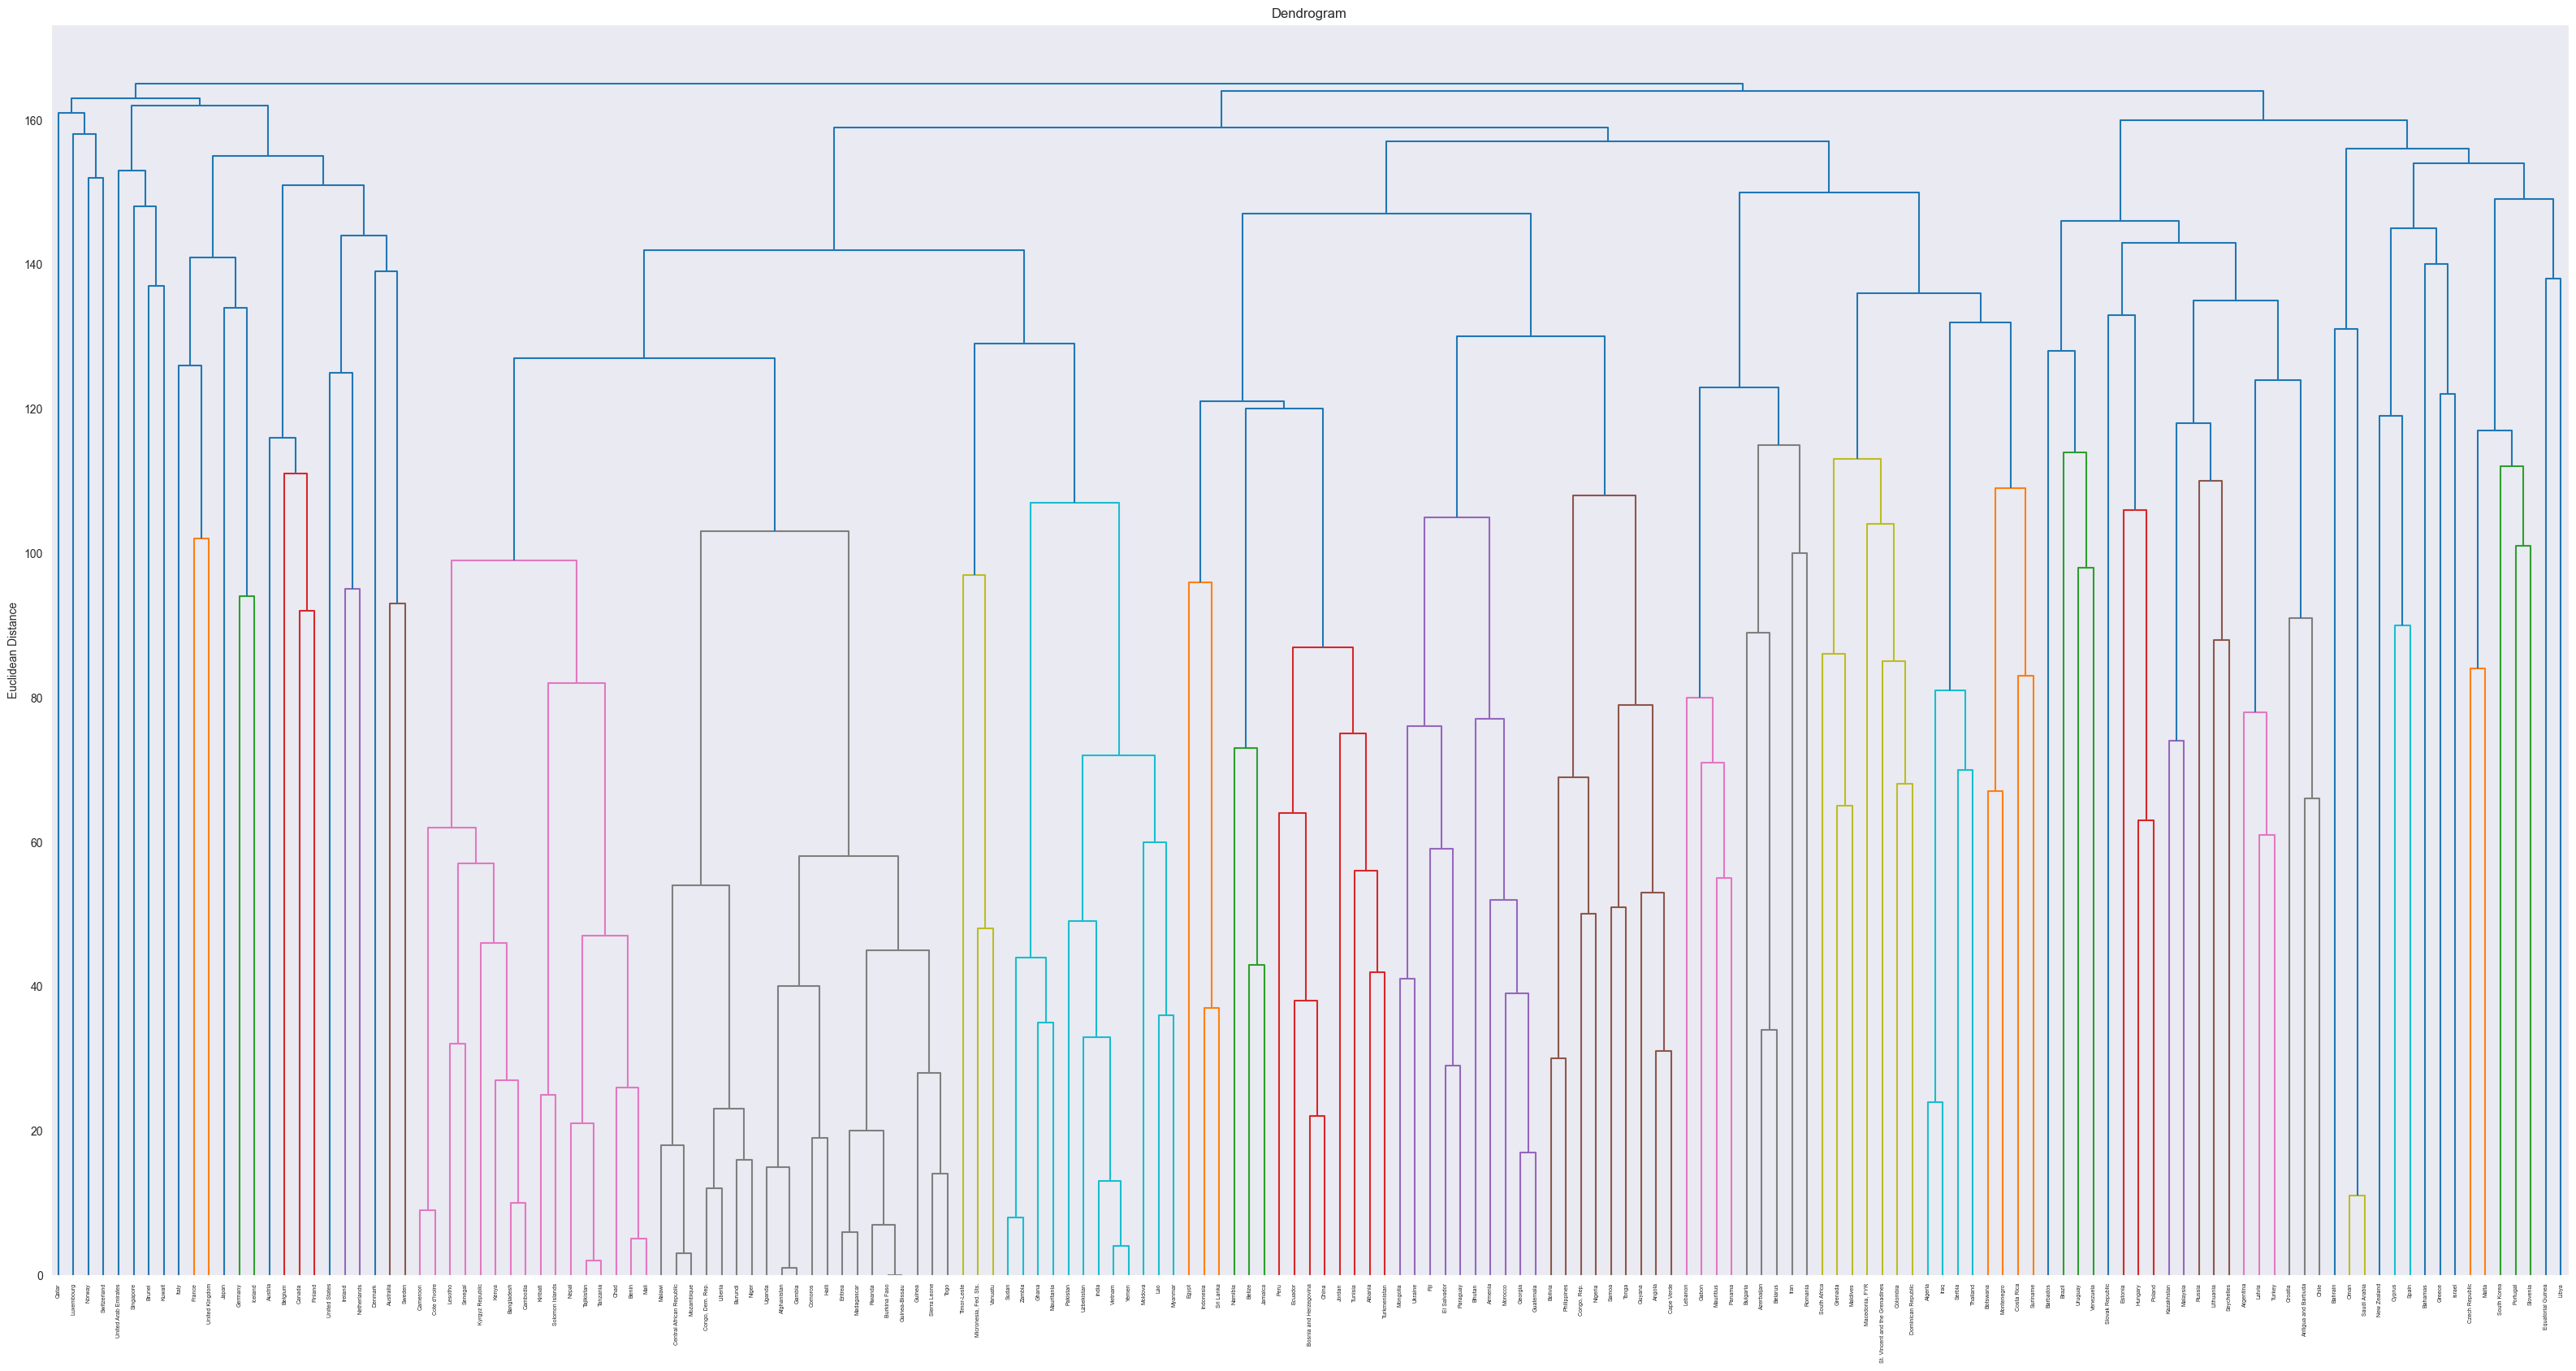

In [37]:
from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = 'ward')

hc_pred = hc.fit_predict(df_hc)

plt.figure(figsize=(40, 20))
plt.grid(False)
plot_dendrogram(hc, labels=df_hc.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [38]:
hc_pred

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

Text(0.5, 1.0, 'Clusterização Hierarchical')

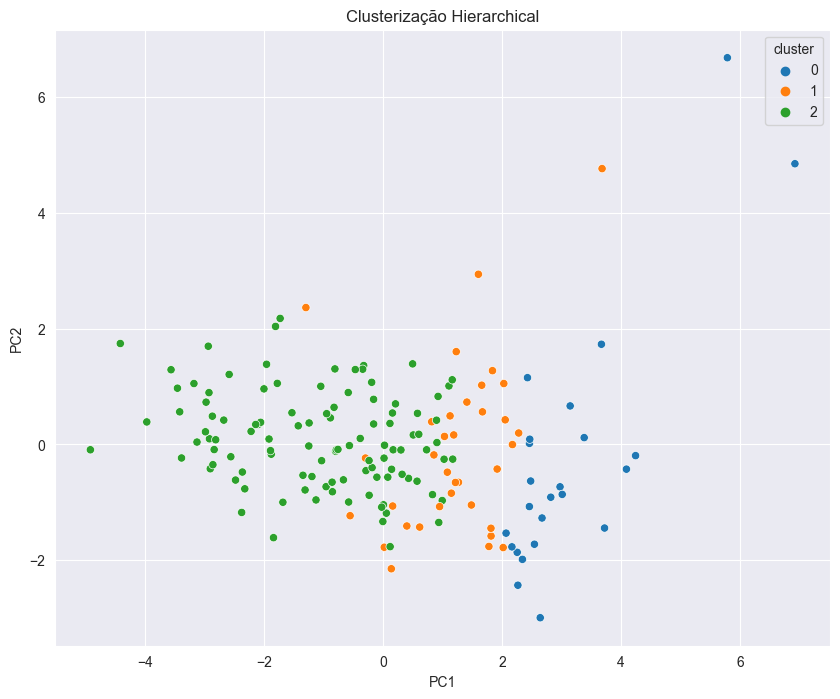

In [39]:
#plot visual da nossa clusterização Hierarchical.

plt.subplots(figsize=(10, 8))
plot_cluster_points(X_normalizado, hc.labels_)
plt.title('Clusterização Hierarchical')

### 4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Text(0.5, 1.0, 'Clusterização Hierárquica')

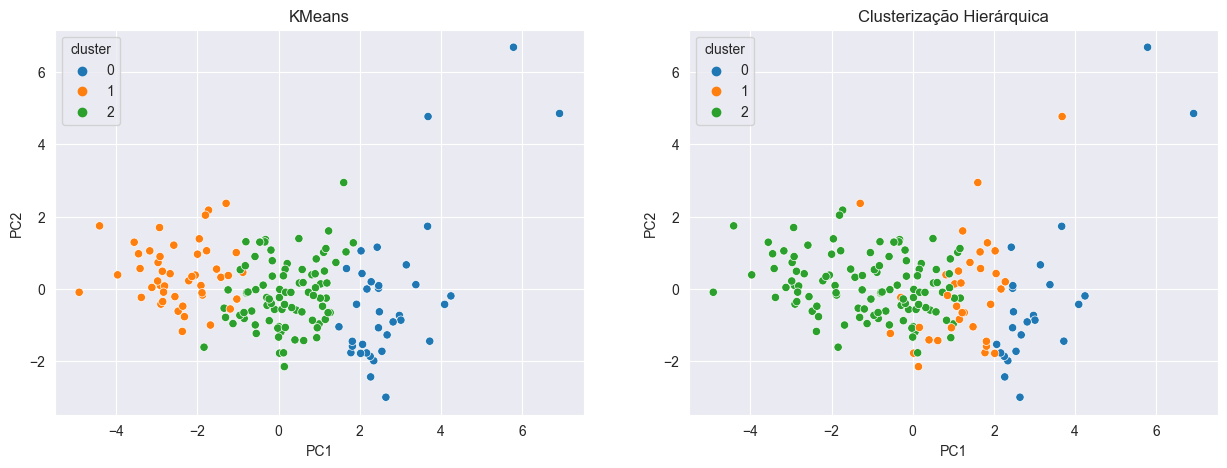

In [40]:
# Comparando os resultados KMeans x Clusterização Hierárquica

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(X_normalizado, kmeans.labels_, ax=axs[0])
axs[0].set_title('KMeans')
plot_cluster_points(X_normalizado, hc.labels_, ax=axs[1])
axs[1].set_title('Clusterização Hierárquica')

Podemos verificar no plot acima, que o K-Means traça um linha mais reta na divisão dos seus grupo, ele acaba tendo dificuldade para identificar cluster que estão um pouco fora do seu agrupamento, diferente da Clusterização Hierárquica. Na Clusterização Hierárquica o número de fetures no cluster (verdes), acabam sendo maiores em comparação com cluster (laranja) do KMeans, o inverso acontece com o cluster (azul) do K-Means, o seu agrupamento acaba sendo maior em comparação com cluster (azul) da Clusterização Hierárquica.

Isso acontece por que o K-Means agrupar simplesmente uma divisão do conjunto de objetos de dados em subconjuntos não sobrepostos (clusters), de modo que cada objeto de dados esteja em exatamente um subconjunto. Enquanto o Um clustering hierárquico é um conjunto de clusters aninhados que são organizados como uma árvore.

Então que algoritimo de agrupamento é melhor? 
Depende da nossa base de dados, como podemos ver a cima o K-Means aparanta ser mais justo na sua clusterização, somente por observar o plot ele dividiu os grupos de forma mais igualitaria. Mas na Clusterização Hierárquica ela conseguiu pegar alguns países que muito provavelmente o K-Means não conseguiria identifica como sendo de seu grupo.

# Escolha de algoritmos

### 1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

Algoritmo de agrupamento K-Mean

Entrada (X):
Conjuntos de dados.
Para encontrar nosso Y precisamos de um número de clusters K ideal, para isso podemos usar um dos métodos chamado método do cotovelo. 

Saída (Y):

Após definimos nosso número de K realizamos o passo do algoritmo para identificar quais fetures são pertencentes a determinados grupos.

Passos: 
* Primeiro definimos um ‘K’.
* Depois escolhemos de forma aleatória um centroide para cada grupo como centroides inicias. 
* Então o algoritmo calcula para cada ponto, o centroide de menor distância. Então vai repetir o mesmo processo até encontrar e associa cada objeto ao seu ponto mais próximo do seu centroide. 
* Então o último passo é repetido até que o ponto de convergência seja alcançado. (O algoritmo converge quando a atribuição de registros aos clusters se torna constante, ou seja, quando os as fetures pertencentes a cada cluster não mudam mais)


### 2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

In [41]:
from sklearn_extra.cluster import KMedoids

In [42]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_kmedoids = kmedoids.fit_predict(X_normalizado)

Text(0.5, 1.0, 'K-Medoides')

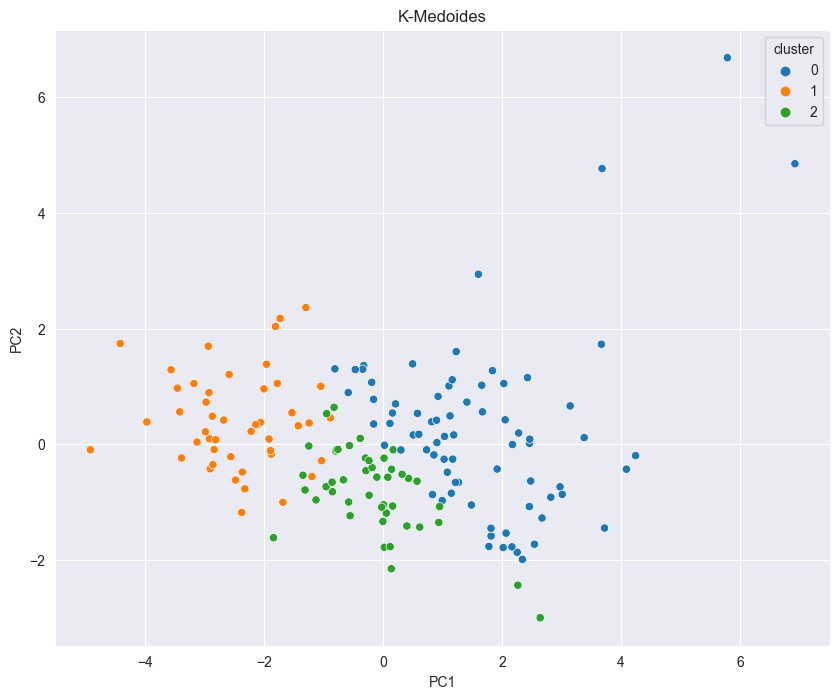

In [43]:
plt.subplots(figsize=(10, 8)),
plot_cluster_points(X_normalizado, kmedoids.labels_),
plt.title('K-Medoides')

In [44]:
kmedoids.labels_

array([1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1], dtype=int64)

In [45]:
kmedoids.cluster_centers_

array([[-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713],
       [ 0.83639913, -0.81994613, -0.29419715, -0.73705173, -0.78327176,
         0.13930796, -1.26946162,  1.64448575, -0.67102583],
       [-0.09625098, -0.67358583, -0.21751566, -0.56304499, -0.31449564,
        -0.22220615,  0.45613363, -0.2305454 , -0.41119952]])

In [46]:
todas_distancias_hc = kmedoids.fit_transform(X_normalizado)
todas_distancias_hc[:5]

array([[4.4134455 , 1.12056283, 3.45502461],
       [1.12489274, 3.61277636, 1.04891641],
       [2.11629606, 3.09625995, 1.43016126],
       [4.98028894, 2.72722585, 4.37159617],
       [0.        , 3.90351423, 1.6724919 ]])

In [47]:
distancias_hc = []
for i in todas_distancias_hc:
    distancias_hc.append(i.min())

distancias_hc[:5]

[1.1205628255226647,
 1.0489164138341547,
 1.4301612592987791,
 2.7272258461388086,
 0.0]

In [48]:
df_kmedoids = dataset.copy()
df_kmedoids['cluster'] = y_kmedoids
df_kmedoids['distancias'] = distancias_hc
df_kmedoids.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1.120563
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1.048916
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1.430161
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2.727226
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0.000000


In [49]:
clusters_medoids_0 = df_kmedoids[df_kmedoids['cluster']==0]
clusters_medoids_1 = df_kmedoids[df_kmedoids['cluster']==1]
clusters_medoids_2 = df_kmedoids[df_kmedoids['cluster']==2]

In [50]:
# Medoids que representa o grupo 0.
clusters_medoids_0[clusters_medoids_0['distancias'] == clusters_medoids_0['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0.0


In [51]:
# Medoids que representa o grupo 1.
clusters_medoids_1[clusters_medoids_1['distancias'] == clusters_medoids_1['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702,1,0.0


In [52]:
# Medoids que representa o grupo 2..
clusters_medoids_2[clusters_medoids_2['distancias'] == clusters_medoids_2['distancias'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,distancias
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.6,5450,2,1.490116e-08


Como podemos ver no caso do algoritimo "K-Medoids" os países que o representam são Antigua and Barbuda, Tanzania e Dominican Republic, isso se da por que enquanto no KMeans tenta minimizar a soma dos quadrados dentro do cluster, KMedoids tenta minimizar a soma das distâncias entre cada ponto e o medoid de seu cluster. O medoid é um ponto de dados (ao contrário do centróide) que tem a menor distância total para os outros membros de seu cluster.

 ### 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Como próprio nome do algoritmo menciona, o K-média trabalha com a médias. Nesse caso como os outliers são dados que se diferenciam drasticamente de todos os outros, ou seja, é um valor que foge da normalidade, isso irá causar anomalias nos resultados obtidos por meio do algoritmo, podendo podem enviesar negativamente todo o resultado de uma análise.

### 4 .Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O agrupamento DBScan lida de forma eficiente com outliers e conjuntos de dados ruidosos. Visto que é um algoritmo de clustering baseado em densidade. O principal fato desse algoritmo é que a vizinhança de cada ponto em um cluster que está dentro de um determinado raio (R) deve ter um número mínimo de pontos (M).  No DBScan um outlier é um ponto que não é um ponto central e, também, não está próximo o suficiente para ser alcançado a partir de um ponto central. Sendo assim os pontos discrepantes são eliminados e os pontos principais que são vizinhos são conectados e colocados no mesmo cluster.